In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,f1_score,confusion_matrix,accuracy_score

In [2]:
email_df=pd.read_csv('emails_dataset.csv')

In [3]:
email_df.head(10)

,subject,from,to,date,body,label
0,"ec 335 , ei 305 and smi 23 revision effective ...",NaN,NaN,NaN,p / l )\n- - - - - - - - - - - - - - - - - - -...,0
1,Re: [Razor-users] Razor with sendmail,Theo Van Dinter <felicity@kluge.net>,Sven Willenberger <sven@dmv.com>,"Fri, 23 Aug 2002 16:26:18 -0400","On Fri, Aug 23, 2002 at 04:17:55PM -0400, Sven...",0
2,e - commerce & continental europe,NaN,NaN,NaN,"hi sven ,\nthanks a lot for your note - i thin...",0
3,Play by Play: Effective Memory Management,guardian <rssfeeds@example.com>,yyyy@example.com,"Thu, 26 Sep 2002 15:29:31 -0000","URL: http://www.newsisfree.com/click/-6,650303...",0
4,Re: [SAtalk] O.T. Habeus -- Why?,bob@proulx.com,Spamassassin-Talk <spamassassin-talk@example.s...,"Thu, 29 Aug 2002 10:32:57 -0600",Justin Mason <jm@jmason.org> [2002-08-29 17:00...,0
5,Robbie Williams signs £80m deal,guardian <rssfeeds@example.com>,yyyy@example.com,"Thu, 03 Oct 2002 08:02:12 -0000","URL: http://www.newsisfree.com/click/215,8,215...",0
6,info missing medical detaiis found 24 th march,NaN,NaN,NaN,stop\nthe protesters were also calling for an ...,1
7,RE: [ILUG] slashdot EW Dijkstra humor,Kenn Humborg <kenn@bluetree.ie>,"Nick Murtagh <nickm@go2.ie>, ilug@linux.ie","Mon, 12 Aug 2002 19:56:23 +0100",> > If you're using a break or similar constru...,0
8,[ILUG] Create a PAYCHECK with your COMPUTER an...,Hugh5546x73@bigfoot.com,ilug@linux.ie,"Tue, 24 Sep 2002 01:31:44 +1200",Hi -\n\n( http://club.4tfox.com )\n\nYou get e...,1
9,Re: It's a small world,Luis Villa <louie@ximian.com>,Jesse <jesse@fsck.com>,"Thu, 15 Aug 2002 18:01:06 -0400","On Thu, 2002-08-15 at 17:53, Jesse wrote:\n> \...",0


In [4]:
email_df['label'].unique()

array([0, 1], dtype=int64)

In [5]:
email_df.shape

(16933, 6)

In [6]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16933 entries, 0 to 16932
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  16849 non-null  object
 1   from     9347 non-null   object
 2   to       8978 non-null   object
 3   date     9348 non-null   object
 4   body     16828 non-null  object
 5   label    16933 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 793.9+ KB


In [7]:
email_df.isnull().sum()

subject      84
from       7586
to         7955
date       7585
body        105
label         0
dtype: int64

In [8]:
email_df = email_df.dropna(subset='body')

In [9]:
email_df = email_df.dropna(subset='subject')

In [10]:
email_df.isnull().sum()

subject       0
from       7460
to         7829
date       7459
body          0
label         0
dtype: int64

In [11]:
email_df['label'].value_counts()

0    11401
1     5353
Name: label, dtype: int64

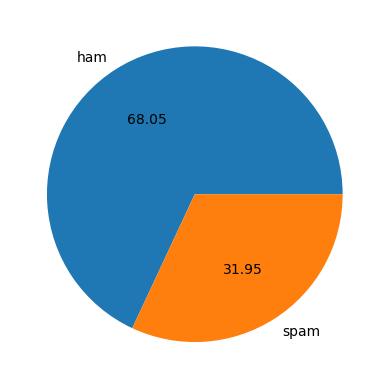

<Figure size 2000x2000 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
plt.pie(email_df['label'].value_counts(), labels = ['ham','spam'],autopct="%0.2f")
plt.figure(figsize=(20,20))
plt.show()

In [13]:
X = email_df.drop(['from','to','date'],axis=1)
y = email_df['label']

In [14]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [15]:
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Load stopwords
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function with lemmatization
def preprocess_text(text):
    text = text.lower()
    # Only parse with BeautifulSoup if "<" is in the text (indicating HTML tags)
    if '<' in text and '>' in text:
        text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'http\S+|www.\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)      # Remove special characters
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
email_df['preprocessed_body'] = email_df['body'].apply(preprocess_text)

# Vectorize
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(email_df['preprocessed_body']).toarray()


In [16]:
email_df.sample(10)

,subject,from,to,date,body,label,preprocessed_bodyy
2682,enrononline energy e - trade resumes after hal...,NaN,NaN,NaN,update 1 - enrononline energy e - trade resume...,0,update enrononline energy e trade resume halt ...
10843,in the heart of your business !,NaN,NaN,NaN,corporate image can say a lot of things about ...,1,corporate image say lot thing company contempo...
12151,fw : trader presentation - afternoon of thursd...,NaN,NaN,NaN,"louise ,\nare you working on this ?\nliz\n- - ...",0,louise working liz original message gil mercy ...
8144,here is the place to find the one you ' ve bee...,NaN,NaN,NaN,here ' s a service for singles over 30 .\nmany...,1,service single many lucky single like found lo...
1913,Another fine mess I've got myself into...,guardian <rssfeeds@example.com>,yyyy@example.com,"Sun, 06 Oct 2002 08:00:36 -0000","URL: http://www.newsisfree.com/click/-0,859765...",0,url date politics disgraced peer jeffrey arche...
174,Re: Digital radio playlists are prohibited?!,Tom <tomwhore@slack.net>,fork@spamassassin.taint.org,"Wed, 25 Sep 2002 18:45:29 -0400",--]\n--] Anyone heard of this law before?\n\nB...,0,anyone heard law back running wsmf shoutcast s...
2484,Family refuses to cancel expensive wedding jus...,fark <rssfeeds@example.com>,yyyy@example.com,"Tue, 01 Oct 2002 08:01:20 -0000","URL: http://www.newsisfree.com/click/-1,840674...",0,url date guy
7429,Re: [SAdev] Spam added to regular email,"""Tony L. Svanstrom"" <tony@svanstrom.com>",Marc Perkel <marc@perkel.com>,"Mon, 22 Jul 2002 17:00:18 +0200","On Mon, 22 Jul 2002 the voices made Marc Perke...",0,mon jul voice made marc perkel write ive worki...
13327,third report on helsinki office,NaN,NaN,NaN,"steve ,\ni am still a little out of it from my...",0,steve still little travel let take first shot ...
15490,Re: Selling Wedded Bliss (was Re: Ouch...),CDale <cdale@techmonkeys.net>,Russell Turpin <deafbox@hotmail.com>,"Sat, 07 Sep 2002 10:49:41 -0500","Oh, well, uh, thank you, Russell. LOL@#! (I ...",0,oh well uh thank russell lol think c sat sep r...


In [16]:
email_df['num_characters'] = email_df['preprocessed_body'].apply(len)

In [17]:
import nltk
email_df['num_words'] = email_df['preprocessed_body'].apply(lambda x:len(nltk.word_tokenize(x)))

In [18]:
email_df.sample(10)

,subject,from,to,date,body,label,preprocessed_body,num_characters,num_words
1692,Stupid for a Day,zawodny <rssfeeds@spamassassin.taint.org>,yyyy@spamassassin.taint.org,"Mon, 30 Sep 2002 08:01:57 -0000",URL: http://jeremy.zawodny.com/blog/archives/0...,0,url date like kasias latest idea let try day m...,108,21
4544,しじみともものコラボレーション,"""rite1@reset.jp""@p6044-ipad22marunouchi.tokyo....",121@p6044-ipad22marunouchi.tokyo.ocn.ne.jp,"Tue, 10 Sep 2002 13:38:32 +0900",����������������������������\n���������������R...,1,rv rfiicucj c cn ibdi fg unsubscribe send mail...,104,14
9702,druuugs onliiiiine very cheaaaap,NaN,NaN,NaN,"hello calvin ,\nviaaagra , ciiiialis , ambieee...",1,hello calvin viaaagra ciiiialis ambieeen xanaa...,382,46
5905,Your approval is needed,Offers <Offers@allbestcheapstuff.com>,yyyy@netnoteinc.com,"Fri, 19 Apr 2002 22:58:17 -0400",\n\n******************************************...,1,cash giveaway dear jmnetnoteinccom youre recei...,601,75
11469,raptors,NaN,NaN,NaN,here is the most recent version of the spreads...,0,recent version spreadsheet accompanying assump...,50,5
11095,NORTON SYSTEMWORKS 2002 CLEARANCE SALE! 6801wb...,letsrope3626o20@abanet.it,webmaster@efi.ie,"Mon, 23 Sep 2002 21:32:14 +0800","<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 3.2//E...",1,untitled attention must computer user newspeci...,267,33
2306,resignation of jenny lu,NaN,NaN,NaN,today we concluded our investigation concernin...,0,today concluded investigation concerning resig...,499,64
2007,Use your Computer to fix your Bad Credit. ...,Precious Shamp <mnereetcaenure@msn.com>,rstruthers@nut-n-but.net,"Thu, 18 Jul 2002 13:29:03 -1700",<html>\n<HEAD> \n<TITLE>creditfix</TITLE> \n</...,1,creditfix thank email address obtained purchas...,268,40
8981,Apple: Heinous DVD Pirates,aaronsw <rssfeeds@spamassassin.taint.org>,yyyy@spamassassin.taint.org,"Tue, 08 Oct 2002 08:00:07 -0000",URL: http://www.aaronsw.com/weblog/000644\nDat...,0,url date dec detractor repeatedly claimed dec ...,1114,168
14554,start date : 1 / 11 / 02 ; hourahead hour : 7 ;,NaN,NaN,NaN,start date : 1 / 11 / 02 ; hourahead hour : 7 ...,0,start date hourahead hour ancillary schedule a...,158,21


In [19]:
email_df['num_sentences'] = email_df['preprocessed_body'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [20]:
email_df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,16754.000000,16754.000000,16754.000000
mean,1032.212964,143.469619,0.997493
std,2879.735691,361.909169,0.050007
min,0.000000,0.000000,0.000000
25%,234.000000,34.000000,1.000000
50%,496.000000,72.000000,1.000000
75%,981.000000,140.000000,1.000000
max,120883.000000,16957.000000,1.000000


In [21]:
email_df[email_df['label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,11401.000000,11401.000000,11401.000000
mean,1022.908517,144.615999,0.999561
std,2915.537046,399.505103,0.020938
min,0.000000,0.000000,0.000000
25%,227.000000,33.000000,1.000000
50%,496.000000,72.000000,1.000000
75%,971.000000,140.000000,1.000000
max,120883.000000,16957.000000,1.000000


In [22]:
email_df[email_df['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5353.000000,5353.000000,5353.000000
mean,1052.029890,141.028022,0.993088
std,2802.126189,264.611265,0.082858
min,0.000000,0.000000,0.000000
25%,251.000000,37.000000,1.000000
50%,497.000000,72.000000,1.000000
75%,1016.000000,145.000000,1.000000
max,101625.000000,6324.000000,1.000000


<Axes: xlabel='num_characters', ylabel='Count'>

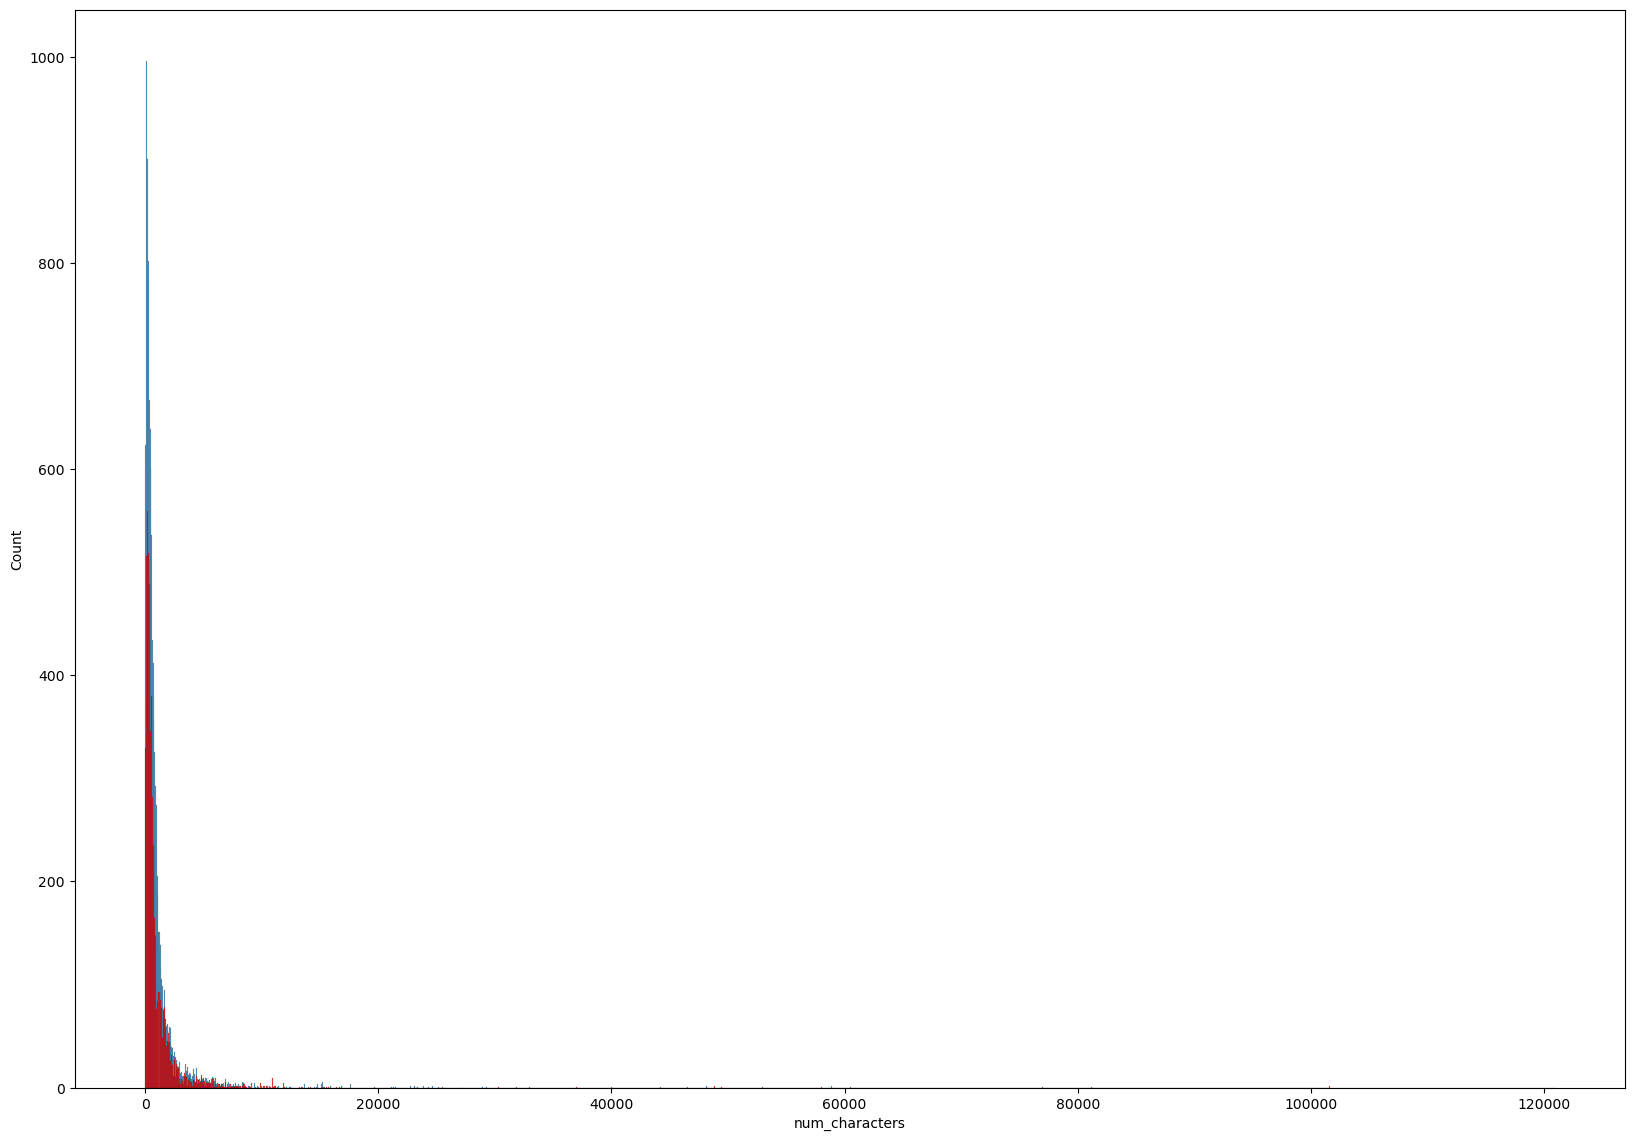

In [23]:
import seaborn as sns
plt.figure(figsize=(20,14))
sns.histplot(email_df[email_df['label'] == 0]['num_characters'])
sns.histplot(email_df[email_df['label'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

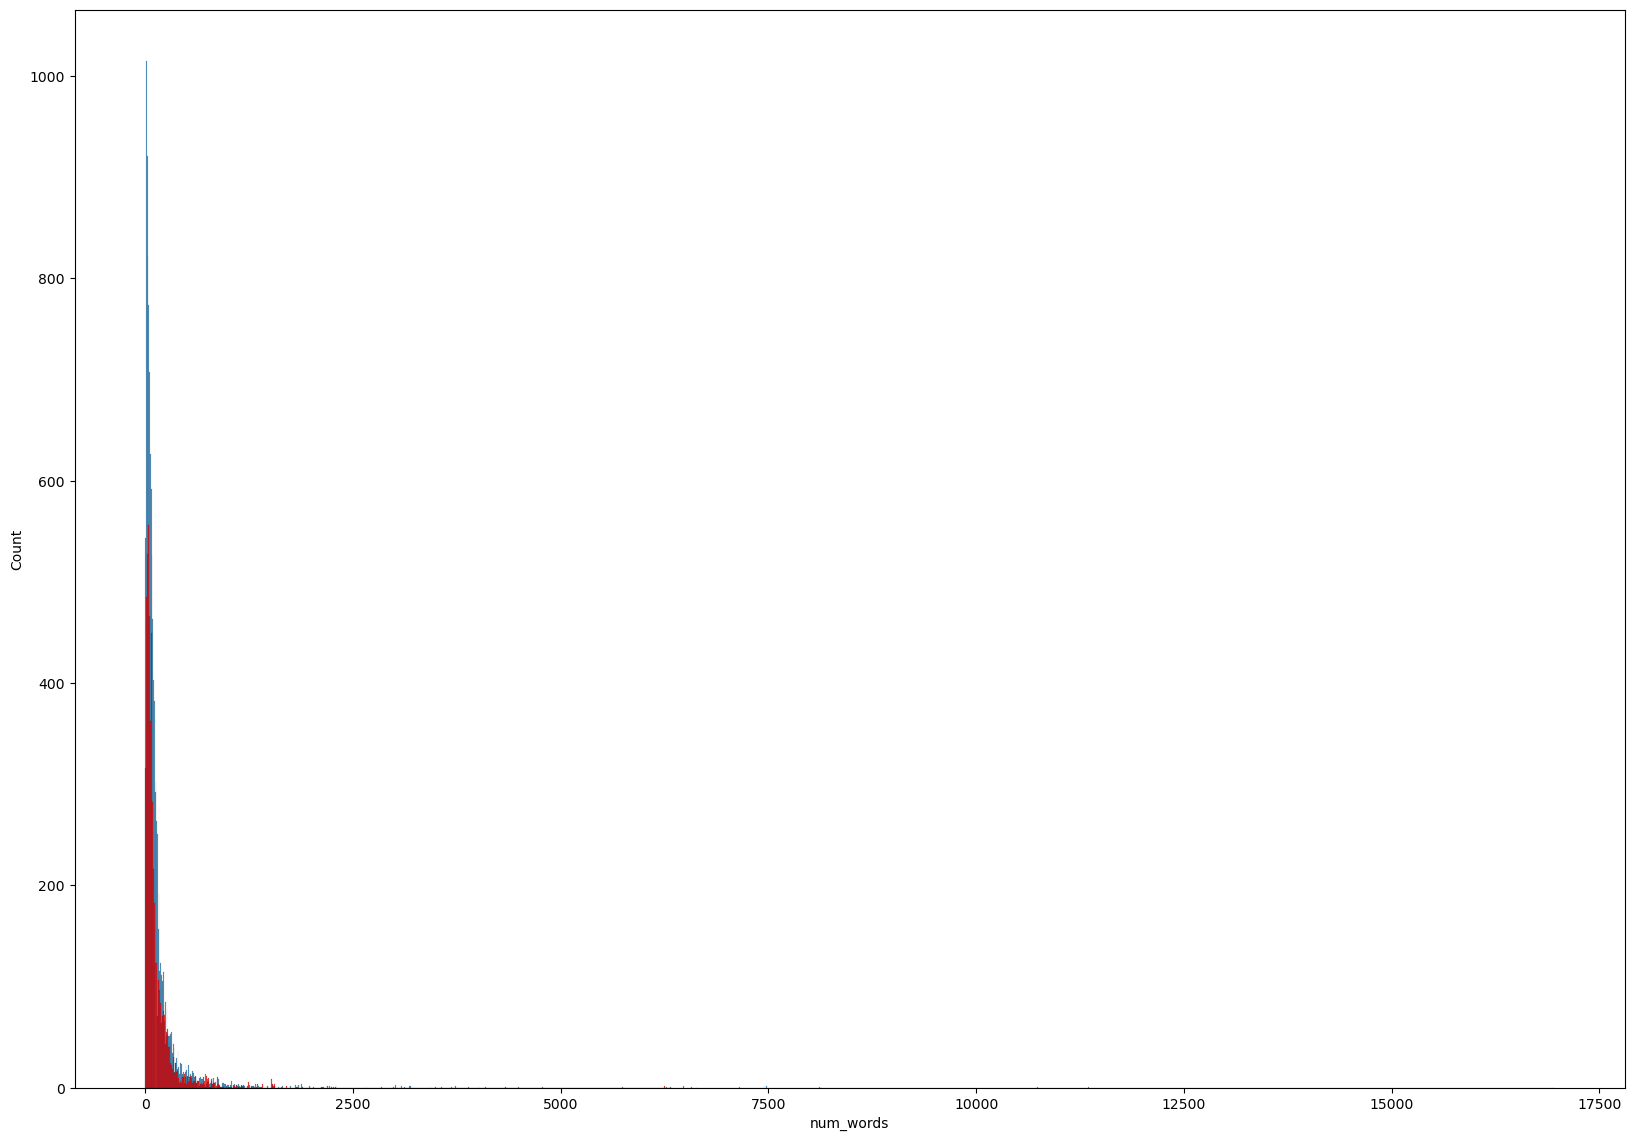

In [24]:
plt.figure(figsize=(20,14))
sns.histplot(email_df[email_df['label'] == 0]['num_words'])
sns.histplot(email_df[email_df['label'] == 1]['num_words'],color='red')

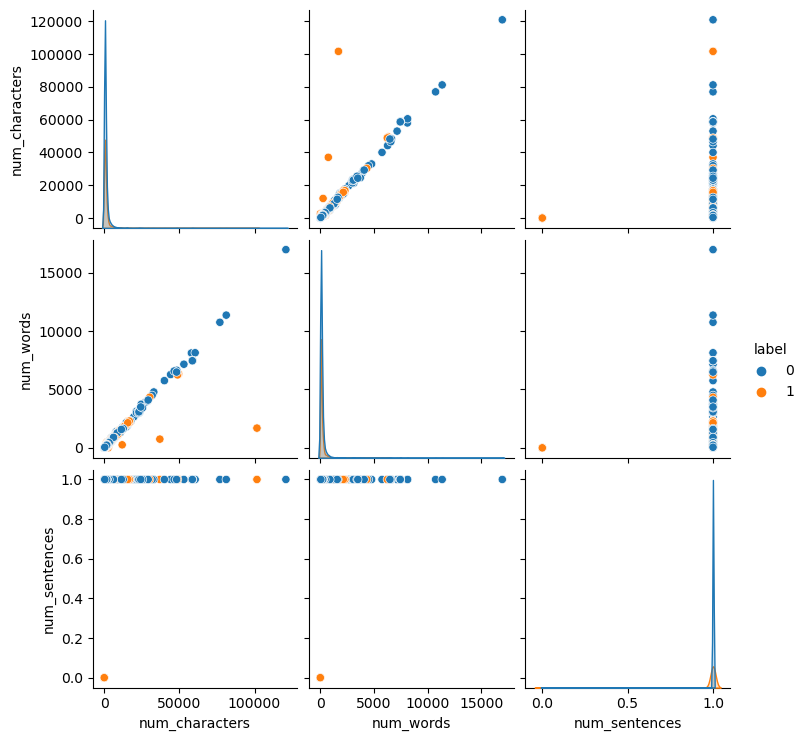

In [25]:
sns.pairplot(email_df,hue='label')

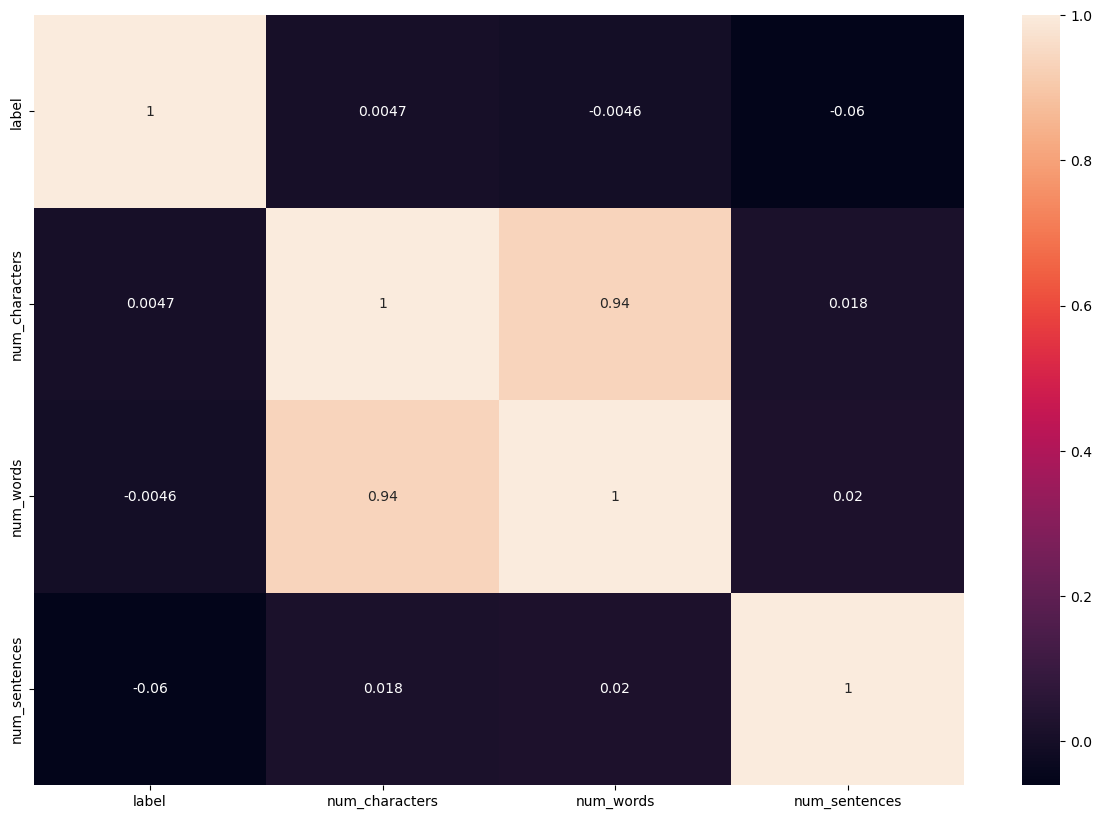

In [26]:
numeric_df = email_df.select_dtypes(include=[float, int])
plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

In [27]:
email_df.head(10)

,subject,from,to,date,body,label,preprocessed_body,num_characters,num_words,num_sentences
0,"ec 335 , ei 305 and smi 23 revision effective ...",NaN,NaN,NaN,p / l )\n- - - - - - - - - - - - - - - - - - -...,0,p l forwarded ami chokshi corp enron pm steve ...,202,38,1
1,Re: [Razor-users] Razor with sendmail,Theo Van Dinter <felicity@kluge.net>,Sven Willenberger <sven@dmv.com>,"Fri, 23 Aug 2002 16:26:18 -0400","On Fri, Aug 23, 2002 at 04:17:55PM -0400, Sven...",0,fri aug pm sven willenberger wrote see option ...,417,59,1
2,e - commerce & continental europe,NaN,NaN,NaN,"hi sven ,\nthanks a lot for your note - i thin...",0,hi sven thanks lot note think would great see ...,1305,180,1
3,Play by Play: Effective Memory Management,guardian <rssfeeds@example.com>,yyyy@example.com,"Thu, 26 Sep 2002 15:29:31 -0000","URL: http://www.newsisfree.com/click/-6,650303...",0,url date back kb memory computer would ever ne...,285,43,1
4,Re: [SAtalk] O.T. Habeus -- Why?,bob@proulx.com,Spamassassin-Talk <spamassassin-talk@example.s...,"Thu, 29 Aug 2002 10:32:57 -0600",Justin Mason <jm@jmason.org> [2002-08-29 17:00...,0,justin mason well point aim rescoring algorith...,478,70,1
5,Robbie Williams signs £80m deal,guardian <rssfeeds@example.com>,yyyy@example.com,"Thu, 03 Oct 2002 08:02:12 -0000","URL: http://www.newsisfree.com/click/215,8,215...",0,url date art robbie williams become one highes...,65,11,1
6,info missing medical detaiis found 24 th march,NaN,NaN,NaN,stop\nthe protesters were also calling for an ...,1,stop protester also calling international inve...,4989,597,1
7,RE: [ILUG] slashdot EW Dijkstra humor,Kenn Humborg <kenn@bluetree.ie>,"Nick Murtagh <nickm@go2.ie>, ilug@linux.ie","Mon, 12 Aug 2002 19:56:23 +0100",> > If you're using a break or similar constru...,0,youre using break similar construct loop might...,422,57,1
8,[ILUG] Create a PAYCHECK with your COMPUTER an...,Hugh5546x73@bigfoot.com,ilug@linux.ie,"Tue, 24 Sep 2002 01:31:44 +1200",Hi -\n\n( http://club.4tfox.com )\n\nYou get e...,1,hi get email every day offering show make mone...,1738,253,1
9,Re: It's a small world,Luis Villa <louie@ximian.com>,Jesse <jesse@fsck.com>,"Thu, 15 Aug 2002 18:01:06 -0400","On Thu, 2002-08-15 at 17:53, Jesse wrote:\n> \...",0,thu jesse wrote thu aug pm luis villa wrote fw...,545,79,1


In [30]:
spam_corpus = []
for msg in email_df[email_df['label'] == 1]['preprocessed_body'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [31]:
len(spam_corpus)

754923

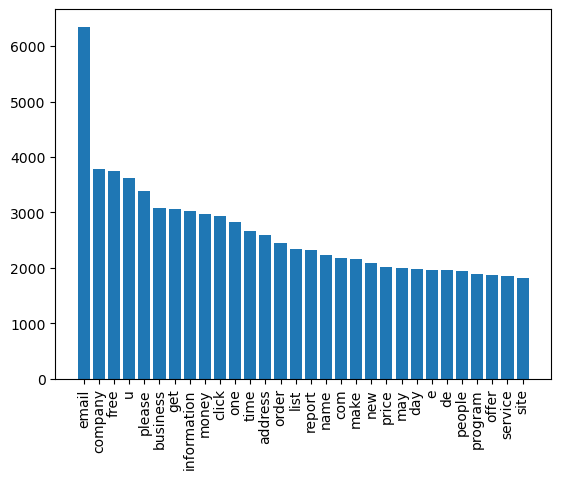

<Figure size 3000x2000 with 0 Axes>

In [32]:
from collections import Counter
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.figure(figsize=(30,20))
plt.show()

In [33]:
ham_corpus = []
for msg in email_df[email_df['label'] == 0]['preprocessed_body'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [34]:
len(ham_corpus)

1648767

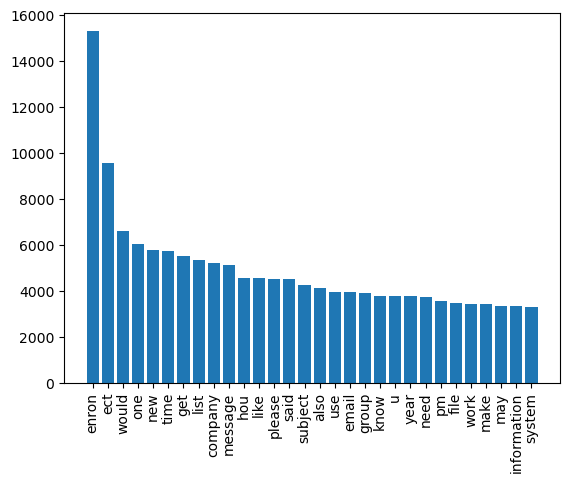

In [35]:
from collections import Counter
plt.bar(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [36]:
X.shape

(16754, 5000)

In [37]:
y = email_df['label'].values
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [39]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [40]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [41]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9401233339964193
[[3242  191]
 [ 110 1484]]
0.8859701492537313


In [42]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9614083946687886
[[3361   72]
 [ 122 1472]]
0.9533678756476683


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [44]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [45]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [46]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [47]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9751342749154566, 0.962822936357908)

In [48]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9751342749154566
Precision -  0.962822936357908
For  KN
Accuracy -  0.5677342351302964
Precision -  0.4228617106314948
For  NB
Accuracy -  0.958225581857967
Precision -  0.9601063829787234
For  DT
Accuracy -  0.8406604336582455
Precision -  0.8588235294117647
For  LR
Accuracy -  0.9616073204694648
Precision -  0.9499036608863198
For  RF
Accuracy -  0.9713546847026059
Precision -  0.9600253807106599


C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9196339765267555
Precision -  0.9213881019830028
For  BgC
Accuracy -  0.9608116172667595
Precision -  0.9362898188632105
For  ETC
Accuracy -  0.9747364233141038
Precision -  0.9692898272552783
For  GBDT
Accuracy -  0.8917843644320669
Precision -  0.9411764705882353
For  xgb
Accuracy -  0.9635965784762284
Precision -  0.9352251696483652


In [49]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [50]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.974736,0.969290
0,SVC,0.975134,0.962823
2,NB,0.958226,0.960106
5,RF,0.971355,0.960025
4,LR,0.961607,0.949904
9,GBDT,0.891784,0.941176
7,BgC,0.960812,0.936290
10,xgb,0.963597,0.935225
6,AdaBoost,0.919634,0.921388
3,DT,0.840660,0.858824


In [51]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [52]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.974736
1,SVC,Accuracy,0.975134
2,NB,Accuracy,0.958226
3,RF,Accuracy,0.971355
4,LR,Accuracy,0.961607
5,GBDT,Accuracy,0.891784
6,BgC,Accuracy,0.960812
7,xgb,Accuracy,0.963597
8,AdaBoost,Accuracy,0.919634
9,DT,Accuracy,0.840660


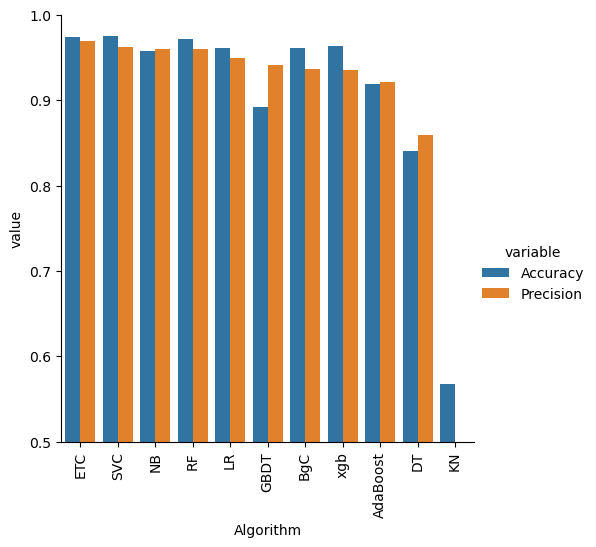

In [53]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [54]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [55]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
8,ETC,0.974736,0.969290
0,SVC,0.975134,0.962823
2,NB,0.958226,0.960106
5,RF,0.971355,0.960025
4,LR,0.961607,0.949904
9,GBDT,0.891784,0.941176
7,BgC,0.960812,0.936290
10,xgb,0.963597,0.935225
6,AdaBoost,0.919634,0.921388
3,DT,0.840660,0.858824


In [56]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [57]:
temp_df

,Algorithm,Accuracy_scaling,Precision_scaling
8,ETC,0.974736,0.969290
0,SVC,0.975134,0.962823
2,NB,0.958226,0.960106
5,RF,0.971355,0.960025
4,LR,0.961607,0.949904
9,GBDT,0.891784,0.941176
7,BgC,0.960812,0.936290
10,xgb,0.963597,0.935225
6,AdaBoost,0.919634,0.921388
3,DT,0.840660,0.858824


In [58]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [59]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [60]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [61]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,ETC,0.974736,0.969290,0.974736,0.969290,0.974736,0.969290,0.974736,0.969290
1,SVC,0.975134,0.962823,0.975134,0.962823,0.975134,0.962823,0.975134,0.962823
2,NB,0.958226,0.960106,0.958226,0.960106,0.958226,0.960106,0.958226,0.960106
3,RF,0.971355,0.960025,0.971355,0.960025,0.971355,0.960025,0.971355,0.960025
4,LR,0.961607,0.949904,0.961607,0.949904,0.961607,0.949904,0.961607,0.949904
5,GBDT,0.891784,0.941176,0.891784,0.941176,0.891784,0.941176,0.891784,0.941176
6,BgC,0.960812,0.936290,0.960812,0.936290,0.960812,0.936290,0.960812,0.936290
7,xgb,0.963597,0.935225,0.963597,0.935225,0.963597,0.935225,0.963597,0.935225
8,AdaBoost,0.919634,0.921388,0.919634,0.921388,0.919634,0.921388,0.919634,0.921388
9,DT,0.840660,0.858824,0.840660,0.858824,0.840660,0.858824,0.840660,0.858824


In [62]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [63]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [64]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [65]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9789138651283071
Precision 0.9696969696969697


In [66]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [67]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [68]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9793117167296599
Precision 0.9644638403990025


In [79]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(clf,open('model.pkl','wb'))